In [ ]:
import torch
import torch.nn as nn
import numpy as np

### Resources: 

https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [ ]:
#torch.cuda.is_available()

In [ ]:
torch.cuda.device(0)

### Softmax 
softmax applies the exponential function to each element, and normalizes by dividing by the sum of all these exponentials
* squashes the output to be between 0 and 1 = probability sum of all probabilities is 1
* sigmoid squashes a vector in the range (0, 1)

![image.png](https://i.stack.imgur.com/0rewJ.png)

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [ ]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


![img.png](https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg)

### Cross entropy
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. 

* loss increases as the predicted probability diverges from the actual label.
 So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

 ![img.png](https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png)

 The graph above shows the range of possible loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predictions that are confident and wrong!

In [ ]:
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

![image.png](https://cdn-images-1.medium.com/max/1000/1*lUUmNbjMNS1rfX4El9i5VA.png)

![image.png](https://gombru.github.io/assets/cross_entropy_loss/intro.png)

### Example 1: 

In [ ]:
# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


### Example: 2

In [ ]:
print('NN1')
# defined three samples
# actual cat , dog prediction 
y_actual1 = np.array([1,0])
y_actual2 = np.array([0,1])
y_actual3 = np.array([1,0])
# predicted cat and dog prediction 
y_hat1= np.array([0.9,0.1])
y_hat2= np.array([0.1,0.9])
y_hat3 = np.array([0.4,0.6])
ce1  = cross_entropy(y_actual1,y_hat1)
ce2  = cross_entropy(y_actual2,y_hat2)
ce3  = cross_entropy(y_actual3,y_hat3)
avg_ce_loss = (ce1+ce2+ce3)/3
print(f'Total cross entrophy loss for nn1 :{avg_ce_loss}')

NN1
Total cross entrophy loss for nn1 :0.37567058772993583


In [ ]:
print('NN2')
# defined three samples
# actual cat , dog prediction 
y_actual1 = np.array([1,0])
y_actual2 = np.array([0,1])
y_actual3 = np.array([1,0])
# predicted cat and dog prediction 
y_hat1= np.array([0.6,0.4])
y_hat2= np.array([0.3,0.7])
y_hat3 = np.array([0.1,0.9])
ce1  = cross_entropy(y_actual1,y_hat1)
ce2  = cross_entropy(y_actual2,y_hat2)
ce3  = cross_entropy(y_actual3,y_hat3)
avg_ce_loss = (ce1+ce2+ce3)/3
print(f'Total cross entrophy loss for nn2 :{avg_ce_loss}')

NN2
Total cross entrophy loss for nn2 :1.056695220232923


![image.png](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/76_blog_image_7.png)

In [ ]:
# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])
print(Y)

tensor([0])


In [ ]:
# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [ ]:
# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1], # will predict 0
    [0.1, 0.3, 1.5],  # will predict 2
    [1.2, 0.2, 0.5]]) # will predict 0

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1) # retun  max along  dim=1, along rows
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

In [ ]:
model = NeuralNet1(input_size=28*28, hidden_size=5)
print(model)
criterion = nn.BCELoss()
print(criterion)

NeuralNet1(
  (linear1): Linear(in_features=784, out_features=5, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)
BCELoss()


In [ ]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

In [ ]:
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
print(model)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)
print(criterion)

NeuralNet2(
  (linear1): Linear(in_features=784, out_features=5, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=5, out_features=3, bias=True)
)
CrossEntropyLoss()


### Activation functions

* Activation are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. 
* Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.

#### Resources: 
https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/#:~:text=Activation%20functions%20are%20mathematical%20equations,relevant%20for%20the%20model's%20prediction.

![img.png](https://missinglink.ai/wp-content/uploads/2018/11/Basic-process-carried-out-by-a-neuron-in-a-neural-network.png)

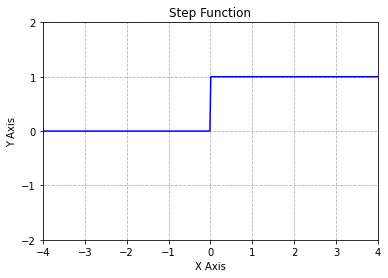

In [93]:
##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()

#### Binary Step function 

A binary step function is a threshold-based activation function. If the input value is above or below a certain threshold, the neuron is activated and sends exactly the same signal to the next layer.

![img.png](https://missinglink.ai/wp-content/uploads/2018/11/binarystepfunction.png)

The problem with a step function is that it does not allow multi-value outputs—for example, it cannot support classifying the inputs into one of several categories.


#### Linear Activation Function

It takes the inputs, multiplied by the weights for each neuron, and creates an output signal proportional to the input. In one sense, a linear function is better than a step function because it allows multiple outputs, not just yes and no.

![img.png](https://missinglink.ai/wp-content/uploads/2018/11/graphsright.png)

However, a linear activation function has two major problems:

1. Not possible to use backpropagation  (gradient descent) to train the model—the derivative of the function is a constant, and has no relation to the input, X. So it’s not possible to go back and understand which weights in the input neurons can provide a better prediction.


2. All layers of the neural network collapse into one—with linear activation functions, no matter how many layers in the neural network, the last layer will be a linear function of the first layer (because a linear combination of linear functions is still a linear function). So a linear activation function turns the neural network into just one layer.



#### Non Linear activation function.

* They allow backpropagation because they have a derivative function which is related to the inputs.
* They allow “stacking” of multiple layers of neurons to create a deep neural network. Multiple hidden layers of neurons are needed to learn complex data sets with high levels of accuracy.


#### 1. Sigmoid

* Advantages

  Smooth gradient, preventing “jumps” in output values.

  Output values bound between 0 and 1, normalizing the output of each neuron.


* Disadvantages

 Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.

 Outputs not zero centered.

 Computationally expensive

In [ ]:
# output = w*x + b
# output = activation_function(output)
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

In [ ]:
# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])


In [ ]:
# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])


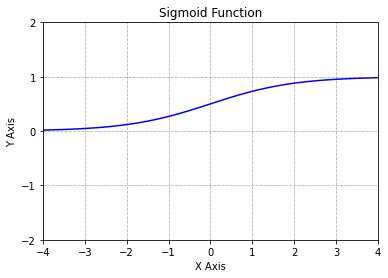

In [89]:
import numpy as np 
import matplotlib.pyplot as plt

##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()

#### 2. TanH / Hyperbolic Tangent

* Advantages
 Zero centered—making it easier to model inputs that have strongly negative, neutral, and strongly positive values.Otherwise like the Sigmoid function.

* Disadvantages

 Like the Sigmoid function

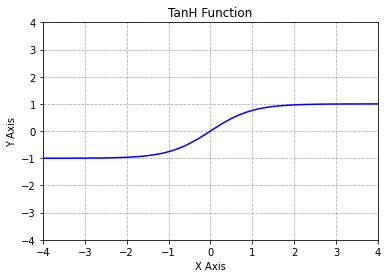

In [90]:
##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()

In [ ]:
#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])


#### 3. ReLU (Rectified Linear Unit)

* Advantages

 Computationally efficient—allows the network to converge very quickly
Non-linear—although it looks like a linear function, ReLU has a derivative function and allows for backpropagation

* Disadvantages

 The Dying ReLU problem—when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.

**In mathematics a function is considered linear whenever a fucntion f:A→B if for every x and y in the domain A has the following property: f(x)+f(y)=f(x+y). By definition the ReLU is max(0,x). Therefore, if we split the domain from (−∞,0] or [0,∞) then the function is linear. However, it's easy to see that f(−1)+f(1)≠f(0). Hence by definition ReLU is not linear**.

In [ ]:
# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)


tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])


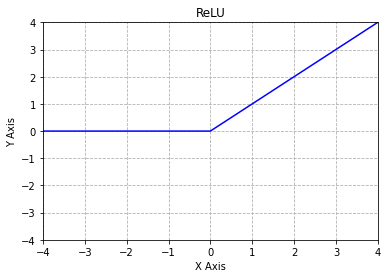

In [91]:
##### ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()

#### 4. Leaky ReLU

* Advantages
 Prevents dying ReLU problem—this variation of ReLU has a small positive slope in the negative area, so it does enable backpropagation, even for negative input values Otherwise like ReLU

* Disadvantages

 Results not consistent—leaky ReLU does not provide consistent predictions for negative input values.

In [ ]:
# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


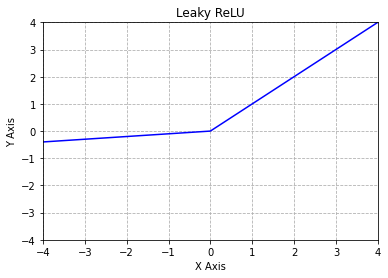

<Figure size 432x288 with 0 Axes>

In [92]:
##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()

![img.png](https://miro.medium.com/max/1600/1*n1HFBpwv21FCAzGjmWt1sg.png)

In [ ]:
#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
model = NeuralNet(input_size=28*28, hidden_size=5)
model

NeuralNet(
  (linear1): Linear(in_features=784, out_features=5, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

In [ ]:
model = NeuralNet(input_size=28*28, hidden_size=5)
model

NeuralNet(
  (linear1): Linear(in_features=784, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)